<a href="https://colab.research.google.com/github/Calista-F/D-and-C/blob/master/20220201_Lopac_(2020)_Table_recreations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
============== Help from Ma'am Reina ============================

Hi Cali, sharing how to use list of dataframes (better option than naming variables dynamically):

dfs = [None] * nfile
for i in np.arange(nfile):
    dfs[i] = pd.read_csv(fndir+fnlist[i], sep='|', header=None)

line 1: create empty list of length nfile
loop: read in file i into dataframe i in the list
"""

"\n============== Help from Ma'am Reina ============================\n\nHi Cali, sharing how to use list of dataframes (better option than naming variables dynamically):\n\ndfs = [None] * nfile\nfor i in np.arange(nfile):\n    dfs[i] = pd.read_csv(fndir+fnlist[i], sep='|', header=None)\n\nline 1: create empty list of length nfile\nloop: read in file i into dataframe i in the list\n"

In [2]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd
from math import log10, sqrt
import cv2
import numpy as np

In [3]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, max_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1VB7SaGWtdRc8lsV4EXCRuQfwXWYLnf8KbMgmsqezgZs/edit#gid=1342867710')
worksheet = repo.worksheet('CCSN_signal60_dist5.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

##Plot normalized noise and normalized embedded signal

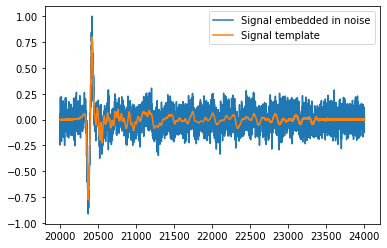

In [5]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

#Test against Lopac 2020


###Table 1

Declare lists for Table 1. Denoising results for the CCSN signal s20a1o05 at a distance of 5 kpc (SNR = 3.9 dB)

In [6]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym5','db13','coif1']
levels = [6,5,7]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 60'
signaldistance = '5 kpc'

Loop through different wavelets, levels, methods, and metrics

In [32]:
for m in methods:
  print(m)
  for i in range(len(wavelets)):
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    print(wavelets[i],'level',levels[i])
    print('RMSE: ',get_rmse(signal_norm_df, denoised_df))
    print('MAE: ',mean_absolute_error(signal_norm_df, denoised_df))
    print('MAX: ',max_error(signal_norm_df, denoised_df))

BayesShrink
sym5 level 6
RMSE:  0.020220044744331686
MAE:  0.015235222704100571
MAX:  0.10286925815644501
db13 level 5
RMSE:  0.019998573840437447
MAE:  0.015028955938666785
MAX:  0.11527205725728462
coif1 level 7
RMSE:  0.023458245496445172
MAE:  0.017271301522449503
MAX:  0.2225180681398784
VisuShrink
sym5 level 6
RMSE:  0.02632533764852241
MAE:  0.018473647498796007
MAX:  0.1396523898019909
db13 level 5
RMSE:  0.019998573840437447
MAE:  0.015028955938666785
MAX:  0.11527205725728462
coif1 level 7
RMSE:  0.028494288619924684
MAE:  0.02000493171846096
MAX:  0.15073786427472247


Create a main list that appends each line and each metric result

In [39]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+  signaldistance +', '+ signalno +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

main_list

[[['BAYESSHRINK, 5 kpc, signal 60, sym5 level 6',
   0.020220044744331686,
   0.015235222704100571,
   0.10286925815644501],
  ['BAYESSHRINK, 5 kpc, signal 60, db13 level 5',
   0.019998573840437447,
   0.015028955938666785,
   0.11527205725728462],
  ['BAYESSHRINK, 5 kpc, signal 60, coif1 level 7',
   0.023458245496445172,
   0.017271301522449503,
   0.2225180681398784]],
 [['VISUSHRINK, 5 kpc, signal 60, sym5 level 6',
   0.02632533764852241,
   0.018473647498796007,
   0.1396523898019909],
  ['VISUSHRINK, 5 kpc, signal 60, db13 level 5',
   0.019998573840437447,
   0.015028955938666785,
   0.11527205725728462],
  ['VISUSHRINK, 5 kpc, signal 60, coif1 level 7',
   0.028494288619924684,
   0.02000493171846096,
   0.15073786427472247]]]

FLAG: Loop through **data** dictionary (below)

In [59]:
data = {'index': indexcol,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table1_df = pd.DataFrame(data, index =metrics)
Table1_df = Table1_df.drop(columns='index')
 
# Print the output.
Table1_df

,"BAYESSHRINK, 5 kpc, signal 60, sym5 level 6","BAYESSHRINK, 5 kpc, signal 60, db13 level 5","BAYESSHRINK, 5 kpc, signal 60, coif1 level 7","VISUSHRINK, 5 kpc, signal 60, sym5 level 6","VISUSHRINK, 5 kpc, signal 60, db13 level 5","VISUSHRINK, 5 kpc, signal 60, coif1 level 7"
RMSE,0.020220,0.019999,0.023458,0.026325,0.019999,0.028494
MAE,0.015235,0.015029,0.017271,0.018474,0.015029,0.020005
MAX,0.102869,0.115272,0.222518,0.139652,0.115272,0.150738


Trying to loop through the columns of Table 1 hehe

In [54]:
data = {'index': indexcol,
        #BayesShrink
        for i in range(3):
          main_list[0][i][0]: main_list[0][i][1:],
        
        #VisuShrink
        for i in range(3):
          main_list[1][i][0]: main_list[1][i][1:],
        }

# Create DataFrame
Table1_df = pd.DataFrame(data, index =metrics)
Table1_df = Table1_df.drop(columns='index')
 
# Print the output.
Table1_df

SyntaxError: ignored